Importing libraries 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

Importing Dataset 

In [3]:
df = pd.read_csv('ipl2024 Matches.csv')
df

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts
0,1,"March 22,2024",Banglore,Chennai,Banglore,Bat,173,6,176,4,Chennai,Mustafizur Rahman,Anuj Rawat,Mustafizur Rahman
1,2,"March 23,2024",Delhi,Punjab,Punjab,Field,174,9,177,6,Punjab,Sam Curran,Sam Curran,Kuldeep Yadav
2,3,"March 23,2024",Kolkata,Hyderabad,Hyderabad,Field,208,7,204,7,Kolkata,Andre Russell,Andre Russell,T Natarajan
3,4,"March 24,2024",Rajasthan,Lucknow,Rajasthan,Bat,193,4,173,6,Rajasthan,Sanju Samson,Sanju Samson,Trent Boult
4,5,"March 24,2024",Gujarat,Mumbai,Mumbai,Field,168,6,162,9,Gujarat,Sai Sudharsan,Dewald Brevis,Jasprit Bumrah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 19,2024",Rajasthan,Kolkata,Kolkata,NaN,0,0,0,0,Abandoned,NaN,NaN,NaN
70,71,"May 21,2024",Hyderabad,Kolkata,Hyderabad,Bat,159,10,164,2,Kolkata,Mitchell Starc,Shreyas Iyer,Mitchell Starc
71,72,"May 22,2024",Banglore,Rajasthan,Rajasthan,Field,172,8,174,6,Rajasthan,Ravichandran Ashwin,Yashasvi Jaiswal,Avesh Khan
72,73,"May 24,2024",Hyderabad,Rajasthan,Rajasthan,Field,175,9,139,7,Hyderabad,Shahbaz Ahmed,Dhruv Jurel,Shahbaz Ahmed


Data cleaning 

In [4]:
df = df.drop(columns=['id','date','toss_winner','decision','most_runs','winner','most_wkts','player_of_the_match'])
df.head(1)

,team1,team2,first_score,first_wkts,second_score,second_wkts
0,Banglore,Chennai,173,6,176,4


In [5]:
df = df.rename(columns={'team1':'TeamA','team2':'TeamB','first_score':'TeamA_score','first_wkts':'TeamA_wickets','second_score':'TeamB_score','second_wkts':'TeamB_wickets'})
df.head(1)

,TeamA,TeamB,TeamA_score,TeamA_wickets,TeamB_score,TeamB_wickets
0,Banglore,Chennai,173,6,176,4


In [6]:
df.drop_duplicates()

,TeamA,TeamB,TeamA_score,TeamA_wickets,TeamB_score,TeamB_wickets
0,Banglore,Chennai,173,6,176,4
1,Delhi,Punjab,174,9,177,6
2,Kolkata,Hyderabad,208,7,204,7
3,Rajasthan,Lucknow,193,4,173,6
4,Gujarat,Mumbai,168,6,162,9
...,...,...,...,...,...,...
69,Rajasthan,Kolkata,0,0,0,0
70,Hyderabad,Kolkata,159,10,164,2
71,Banglore,Rajasthan,172,8,174,6
72,Hyderabad,Rajasthan,175,9,139,7


In [7]:
df.dropna()
df.count()

TeamA            74
TeamB            74
TeamA_score      74
TeamA_wickets    74
TeamB_score      74
TeamB_wickets    74
dtype: int64

In [8]:
df.isna()

,TeamA,TeamB,TeamA_score,TeamA_wickets,TeamB_score,TeamB_wickets
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
69,False,False,False,False,False,False
70,False,False,False,False,False,False
71,False,False,False,False,False,False
72,False,False,False,False,False,False


In [9]:
df.isna().sum()

TeamA            0
TeamB            0
TeamA_score      0
TeamA_wickets    0
TeamB_score      0
TeamB_wickets    0
dtype: int64

Checking Outliers

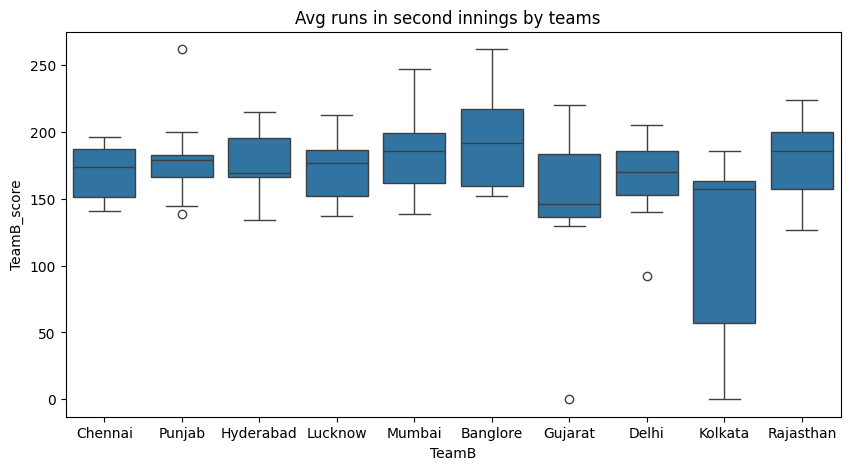

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='TeamB',y='TeamB_score',data=df)
plt.title('Avg runs in second innings by teams  ')
plt.show()

Removing outliers 

In [11]:
Q1 = df.select_dtypes(include = np.number).quantile(0.25)
Q3 = df.select_dtypes(include = np.number).quantile(0.75)
IQR = Q3 - Q1
print(IQR)

TeamA_score      45.75
TeamA_wickets     3.75
TeamB_score      53.00
TeamB_wickets     4.75
dtype: float64


In [12]:
df = df[~((df.select_dtypes(include = np.number) < (Q1 - 1.5 * IQR)) | (df.select_dtypes(include = np.number) > (Q3 + 1.5 * IQR))).any(axis=1)]

In [13]:
Q1 = df.select_dtypes(include = np.number).quantile(0.25)
Q3 = df.select_dtypes(include = np.number).quantile(0.75)
IQR = Q3 - Q1
print(IQR)

TeamA_score      43.0
TeamA_wickets     3.0
TeamB_score      47.0
TeamB_wickets     4.0
dtype: float64


Visualization 

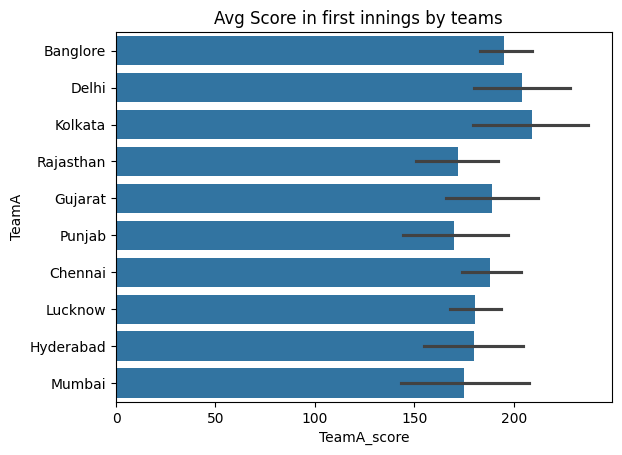

In [14]:
sns.barplot(x='TeamA_score',y ='TeamA',data=df)
plt.title('Avg Score in first innings by teams  ')
plt.show()

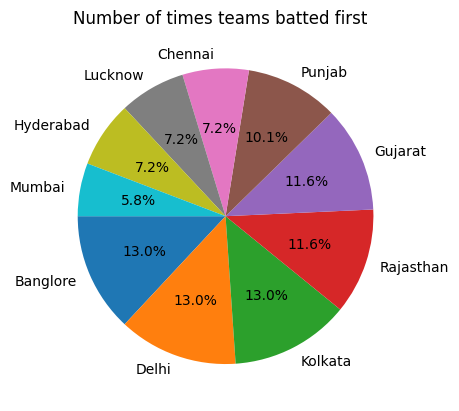

In [15]:
plt.title('Number of times teams batted first  ')
typ = df['TeamA'].unique()
sizes = df['TeamA'].value_counts()
plt.pie(sizes, labels=typ,autopct='%1.1f%%',startangle=180)
plt.show()

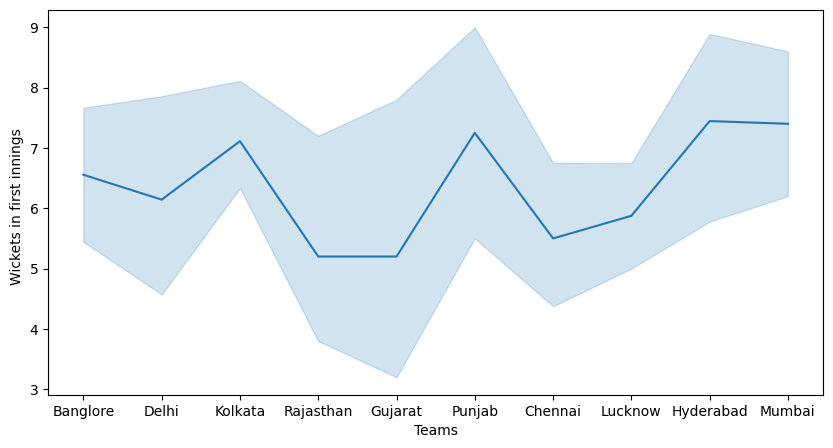

In [16]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='TeamA',y='TeamA_wickets',data = df)
plt.xlabel("Teams")
plt.ylabel("Wickets in first innings  ")
plt.show()

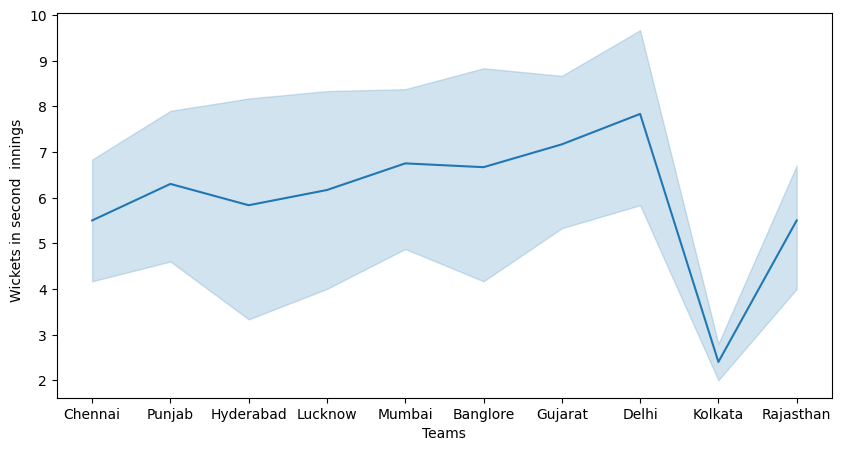

In [17]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='TeamB',y='TeamB_wickets',data = df)
plt.xlabel("Teams")
plt.ylabel("Wickets in second  innings  ")
plt.show()

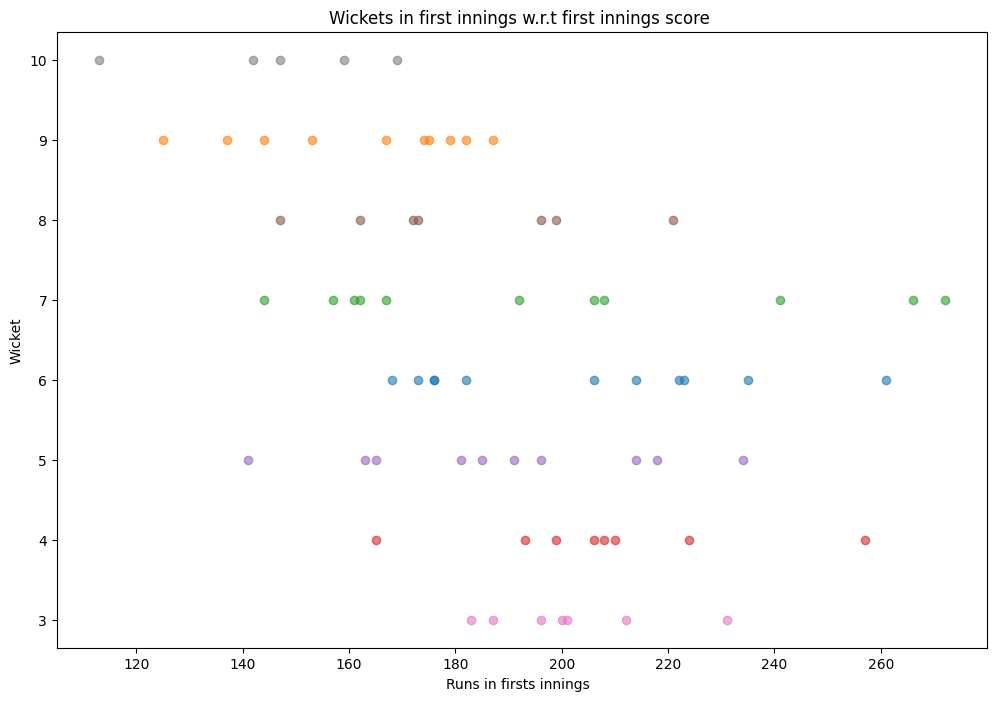

In [18]:
plt.figure(figsize=(12, 8))
for species in df['TeamA_wickets'].unique():
  subset = df[df['TeamA_wickets'] == species]
  plt.scatter( subset['TeamA_score'],subset['TeamA_wickets'], label=species, alpha=0.6)

plt.ylabel('Wicket')
plt.xlabel('Runs in firsts innings  ')
plt.title('Wickets in first innings w.r.t first innings score ')

plt.show()

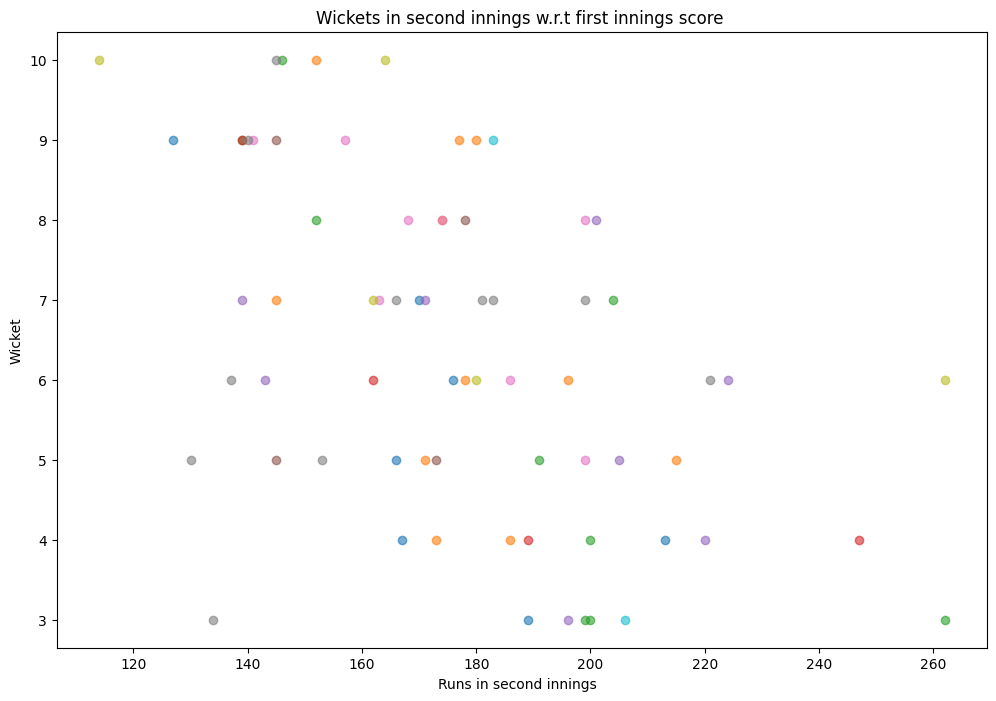

In [19]:
plt.figure(figsize=(12, 8))
for species in df['TeamB_wickets'].unique():
  subset = df[df['TeamB_wickets'] == species]
  plt.scatter( subset['TeamB_score'],subset['TeamA_wickets'], label=species, alpha=0.6)

plt.ylabel('Wicket')
plt.xlabel('Runs in second innings  ')
plt.title('Wickets in second innings w.r.t first innings score ')

plt.show()

Correlation Matrix 

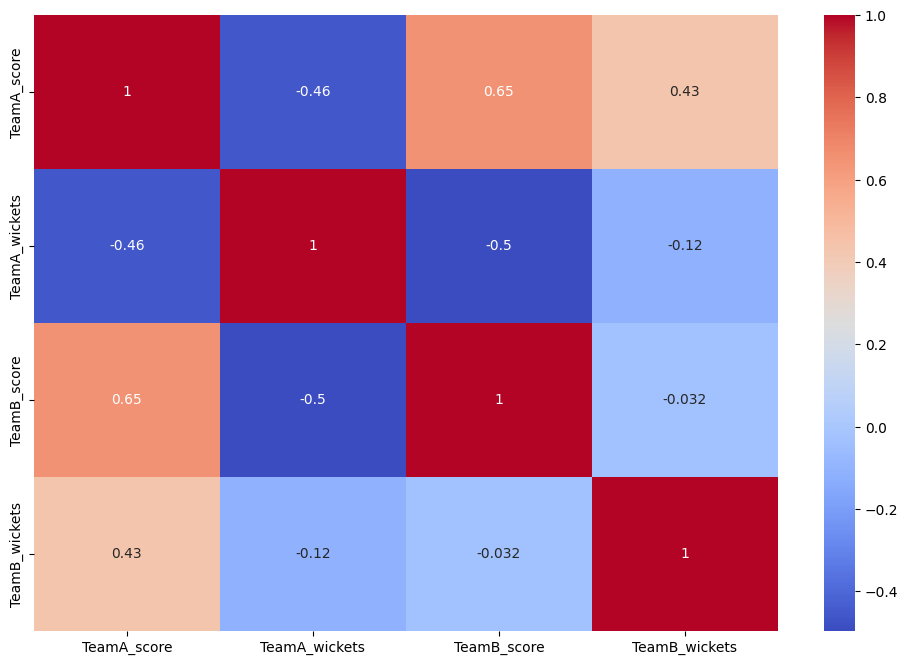

In [20]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Import the required libraries for PCA(Principal Component Analysis)

In [21]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection  import train_test_split
from sklearn.linear_model  import LinearRegression,LogisticRegression
from sklearn.metrics  import accuracy_score,mean_squared_error,r2_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier


Load  and inspect  dataset 

In [22]:
df = pd.read_csv('ipl2024 Matches.csv')

View structure 

In [23]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   74 non-null     int64 
 1   date                 74 non-null     object
 2   team1                74 non-null     object
 3   team2                74 non-null     object
 4   toss_winner          74 non-null     object
 5   decision             71 non-null     object
 6   first_score          74 non-null     int64 
 7   first_wkts           74 non-null     int64 
 8   second_score         74 non-null     int64 
 9   second_wkts          74 non-null     int64 
 10  winner               74 non-null     object
 11  player_of_the_match  71 non-null     object
 12  most_runs            71 non-null     object
 13  most_wkts            71 non-null     object
dtypes: int64(5), object(9)
memory usage: 8.2+ KB


,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts
0,1,"March 22,2024",Banglore,Chennai,Banglore,Bat,173,6,176,4,Chennai,Mustafizur Rahman,Anuj Rawat,Mustafizur Rahman
1,2,"March 23,2024",Delhi,Punjab,Punjab,Field,174,9,177,6,Punjab,Sam Curran,Sam Curran,Kuldeep Yadav
2,3,"March 23,2024",Kolkata,Hyderabad,Hyderabad,Field,208,7,204,7,Kolkata,Andre Russell,Andre Russell,T Natarajan
3,4,"March 24,2024",Rajasthan,Lucknow,Rajasthan,Bat,193,4,173,6,Rajasthan,Sanju Samson,Sanju Samson,Trent Boult
4,5,"March 24,2024",Gujarat,Mumbai,Mumbai,Field,168,6,162,9,Gujarat,Sai Sudharsan,Dewald Brevis,Jasprit Bumrah


Preprocessing 

In [24]:
# droping irrelevent columns
df = df.drop(columns=['id','date','toss_winner','decision','most_runs','winner','most_wkts','player_of_the_match'])
df.head(1)

,team1,team2,first_score,first_wkts,second_score,second_wkts
0,Banglore,Chennai,173,6,176,4


In [25]:
# Renaming the columns for better understanding 
df = df.rename(columns={'team1':'TeamA','team2':'TeamB','first_score':'TeamA_score','first_wkts':'TeamA_wickets','second_score':'TeamB_score','second_wkts':'TeamB_wickets'})
df.head(1)

,TeamA,TeamB,TeamA_score,TeamA_wickets,TeamB_score,TeamB_wickets
0,Banglore,Chennai,173,6,176,4


Encode the catagorical values 

In [26]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [27]:
X = df[['TeamA_wickets', 'TeamB_wickets', 'TeamA_score', 'TeamB_score']]
y = df['TeamA']

Standarization

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.0605925 , -0.61205637, -0.14666953,  0.14676088],
       [ 1.16227426,  0.07418865, -0.12725353,  0.16788987],
       [ 0.34702975,  0.41731116,  0.53289056,  0.73837281],
       [-0.875837  ,  0.07418865,  0.24165052,  0.08337388],
       [-0.0605925 ,  1.10355619, -0.24374955, -0.14904509],
       [-0.0605925 ,  0.07418865, -0.08842153,  0.18901887],
       [-0.0605925 ,  0.76043367,  0.49405855, -0.55049605],
       [-1.28345925, -0.26893386,  1.87259474,  1.62579071],
       [-0.46821475, -0.26893386,  0.0863225 ,  0.08337388],
       [-0.0605925 , -0.95517888,  0.02807449,  0.35805085],
       [ 0.75465201, -0.26893386,  0.35814653,  0.18901887],
       [ 0.75465201, -0.95517888, -0.36024556, -0.02227111],
       [-0.46821475,  0.07418865,  0.20281851,  0.04111589],
       [ 1.16227426, -0.61205637, -1.07863766, -0.88856001],
       [-0.46821475,  1.4466787 ,  0.00865849, -0.33920607],
       [ 0.34702975,  1.4466787 ,  1.77551472, -0.0645291 ],
       [-0.875837  ,  0.

Applying PCA 

In [29]:
pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("After PCA:", X_pca.shape)

Original shape: (74, 4)
After PCA: (74, 3)


Train , test and split 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42)
X_test

array([[ 2.52641162e-01,  1.56125491e-01,  1.04008867e+00],
       [ 1.00730014e+00, -8.18293457e-01,  8.57844315e-01],
       [-1.41729600e-01, -1.40763849e+00, -4.35888228e-01],
       [-2.96170767e-01, -1.55474801e-01, -5.54181867e-01],
       [ 4.71777983e-01, -9.54089500e-01,  2.84261467e-02],
       [-1.96781165e+00,  1.67540989e+00, -7.29383279e-01],
       [ 3.05513611e-01,  6.18222991e-01, -5.26545077e-01],
       [ 2.15926261e+00,  2.49573423e-01,  6.41489970e-01],
       [ 1.38903669e-01, -4.72979672e-01,  1.23608561e-01],
       [ 1.34492433e+00,  6.38792803e-01,  5.46710737e-02],
       [-5.59280571e+00, -1.71751143e+00,  1.01654716e+00],
       [-2.23233430e+00,  1.90723599e+00,  1.24390212e-01],
       [-2.14410584e-01, -2.61090654e-01, -9.64180075e-01],
       [ 4.80643256e-01, -9.79649290e-01,  1.78739153e+00],
       [ 8.19329322e-02, -6.87240063e-02, -4.96845060e-03]])

In [31]:
y_test

4     3
63    2
18    0
0     0
28    1
73    4
10    6
34    4
12    2
55    2
65    4
31    3
9     0
45    1
5     8
Name: TeamA, dtype: int64

In [32]:
y_train

22    4
57    0
50    5
33    1
39    2
70    4
16    3
35    5
44    3
61    0
7     4
56    6
42    2
30    5
47    7
49    4
19    7
59    5
25    6
40    0
13    7
53    5
3     9
17    1
38    1
8     9
58    3
6     1
36    8
67    0
54    4
46    2
72    4
15    5
27    6
41    5
26    8
48    1
24    0
62    3
66    6
11    4
32    7
69    9
64    9
37    7
29    4
43    6
68    8
1     2
52    1
21    5
2     5
23    9
20    6
60    9
71    0
14    6
51    3
Name: TeamA, dtype: int64

In [33]:
X_train

array([[ 3.18061546e-01,  1.09475207e+00, -3.11652820e-01],
       [ 1.61718941e+00,  3.69152615e-01,  8.80546310e-01],
       [ 3.89795484e-01,  1.84227615e+00,  1.13501449e+00],
       [-5.23107897e-01, -2.76793464e-01, -1.17785589e+00],
       [ 1.44099633e+00, -1.01314569e+00,  2.18583039e-01],
       [-7.58703665e-01,  1.39641608e+00, -1.34093145e+00],
       [ 7.16310234e-01, -9.36850431e-01,  1.89844728e-01],
       [ 1.83337639e+00, -1.22181508e-01,  6.07225229e-01],
       [-1.86016549e-01, -1.65639283e+00, -1.51126920e+00],
       [ 5.09808433e-01,  1.42422992e+00,  1.23653208e+00],
       [ 1.92005775e+00, -1.76967637e+00, -9.37978622e-01],
       [-1.23047446e+00, -1.09635396e+00, -1.41533765e+00],
       [ 2.35469677e+00, -1.13203806e+00,  1.58211425e-01],
       [ 1.56859148e+00, -2.35470920e-01, -1.79947322e-03],
       [-6.91787734e-01,  5.13821489e-01,  3.11356562e-01],
       [ 6.96574837e-01, -1.33607647e+00,  2.76335391e-01],
       [ 1.42445593e+00, -5.88734372e-01

Train logistic regression model 

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Evaluate Model 

In [36]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 9.211194030826485
R² Score: -0.884107869941781


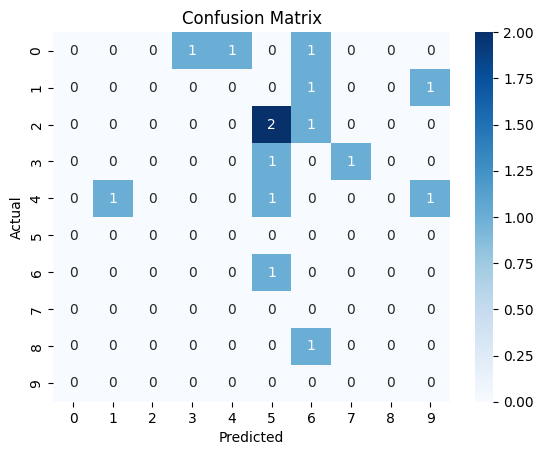

In [ ]:

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()